In [1]:
import pandas as pd
import copy

# importa dataset
mental_health_conversation_dataset = pd.read_csv('./datasets/Mental_Health_FAQ.csv')
mental_health_conversation_dataset.drop(columns=['Question_ID'], axis=0, inplace=True)
# importa dataset
QA_python_dataset = pd.read_csv('./datasets/Dataset_Python_Question_Answer.csv')
QA_python_dataset = QA_python_dataset.rename(columns={"Question": "Questions", "Answer": "Answers"})
#importa dataset
conversation_3d_chatbot = pd.read_csv('./datasets/3d-conversation-chatbot.csv')
conversation_3d_chatbot.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
conversation_3d_chatbot = conversation_3d_chatbot.rename(columns={"question": "Questions", "answer": "Answers"})
#importa dataset
# file = open("./datasets/jungleb.txt", "r")
# the_jungle_book = file.read()
# file.close()
# junta datasets
df_concated = pd.concat([mental_health_conversation_dataset, QA_python_dataset, conversation_3d_chatbot], ignore_index=True)
# tira dados vazios
df_concated.dropna()
# reseta indexes
df_concated = df_concated.reset_index(drop=True)
# clona dataset para conservar tratamento
df_clone = copy.deepcopy(df_concated)
# junta colunas
data = {"text": []}
# data['text'].append(the_jungle_book)
for x in range(0, len(df_clone)):
    text = "".join(df_clone['Questions'][x]+" "+df_clone['Answers'][x])+"\n"
    data['text'].append(text) 
df_merged = pd.DataFrame(data)
df_clone2 = df_merged.copy()
print('done!')

done!


In [4]:
#SOBOSTE

#QA_python_dataset
conversation_3d_chatbot

#SOBOSTE

,Questions,Answers
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [2]:
text = df_clone2.text.values
joined_text = "".join(text)
print('done!')

done!


In [3]:
joined_text = joined_text[:10000]
joined_text = joined_text.split('\n')

In [4]:
import random

import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Activation
from tensorflow.keras.optimizers import RMSprop
print('done!')

done!


In [5]:
max_vocab = 100000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(joined_text)
print('done!')

done!


In [6]:
# pega numero total de palavras
word2idx = tokenizer.word_index
vocab_size = len(word2idx)+1
print('done!')

done!


In [7]:
# transforma sentenças em sequencias de numeros uma por uma
input_seq = []

for line in joined_text:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_seq.append(n_gram_seq)
print('done!')

done!


In [8]:
# max len size of sentences
max_seq_length = max(len(x) for x in input_seq)
# padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen = max_seq_length, padding = 'pre')x) # memory error

In [9]:
# gera xs e labels para treinar modelo

# xs = [sub[:-1] for sub in input_seq]
# labels = [sub[-1] for sub in input_seq]

xs = input_seq[:, :-1]
labels = input_seq[:, -1]

xs

array([[ 0,  0,  0, ...,  0,  0, 17],
       [ 0,  0,  0, ...,  0, 17, 65],
       [ 0,  0,  0, ..., 17, 65, 20],
       ...,
       [ 0,  0,  0, ...,  0,  0, 32],
       [ 0,  0,  0, ...,  0, 32, 15],
       [ 0,  0,  0, ..., 32, 15, 64]])

In [13]:
xs.shape

(1501, 193)

In [10]:
from tensorflow.keras.utils import to_categorical
# one-hot encoding the labels according to the vocab size

# a matrix é matrix quadrada do tamanho do vocab. each row will denote  a label and it will have
# a single +ve value(i.e 1) for that label and other value will be zero.
ys = to_categorical(labels, num_classes = vocab_size)
ys

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
ys.shape

(1501, 465)

In [11]:
# importantop modulos necessarios para treinar o modelo

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [12]:
# usando APIs funcionais do keras para definir o modelo

'''
you typically wouldn't use a Dense Activation layer in the final layer of a text generation model built with LSTMs. Here's why:

Dense Layer Purpose:
A Dense layer in a neural network performs a linear transformation on its input. It takes an input vector and multiplies 
it by a weight matrix, followed by an optional bias addition.
The activation function applied after the Dense layer introduces non-linearity into the model's output. Different activation 
functions like softmax, ReLU, or sigmoid have specific characteristics that influence the model's behavior.
'''

i = Input(shape = (max_seq_length-1, )) # usando 1 valor a menos para preservar o último for prediction words
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(520, return_sequences = True)(x)
x = Bidirectional(layer = LSTM(340, return_sequences = True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i, x)


#using the pipeline method of sequential to define the model

# model = Sequential()
# model.add(vocab_size, 124, input_length=max_seq_length-1)
# model.add(Dropuot(0.2))
# model.add(LSTM(520, return_sequences = True))
# model.add(Bidirectional(LSTM(340, return_sequences = True)))
# model.add(GlobalMaxPooling1D())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(vocab_size, activation='softmax'))

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 193)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 193, 124)       │        57,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 193, 124)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 193, 520)       │     1,341,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 193, 680)       │     2,341,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 680)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       697,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 465)            │       476,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,915,149 (18.75 MB)

 Trainable params: 4,915,149 (18.75 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer = Adam(learning_rate=0.001), # tinha o parametro de learning rate dentro do Adam `lr=0.001` 
              #mas n estava sebdo reconhecido.. era questao de sintaxe...!
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary() # para saber do shape do modelo

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 193)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ (None, 193, 124)       │        57,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 193, 124)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 193, 520)       │     1,341,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 193, 680)       │     2,341,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (None, 680)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │       697,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 465)            │       476,625 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,915,149 (18.75 MB)

 Trainable params: 4,915,149 (18.75 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
r = model.fit(xs, ys, epochs = 10)

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.0225 - loss: 5.8758
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.0379 - loss: 5.4517
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.0433 - loss: 5.4088
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.0419 - loss: 5.4516
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.0373 - loss: 5.3607
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.0262 - loss: 5.2091
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 167s 4s/step - accuracy: 0.0317 - loss: 5.1072
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.0493 - loss: 5.0610
Epoch 9/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.0486 - loss: 4.8964
Epoch 10/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 168s 4s/step - accuracy: 0.0553 - loss: 4.7240


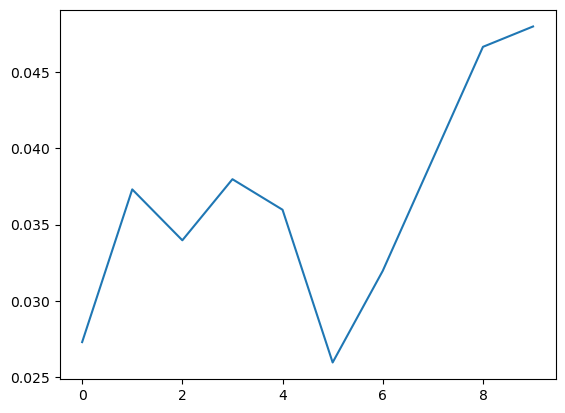

In [61]:
# vizualizando acuracia do modelo
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [63]:
def predict_words(seed, no_words):
    for i in range(no_words):
        token_list = tokenizer.texts_to_sequences([seed])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis = 1)
        
        new_word = ''
        
        for word, index in tokenizer.word_index.items():
            if predicted == index:
                new_word = word
                break
        seed += " " + new_word
    return seed
print('done!')

done!


In [65]:
predict_words('what is a mental illness ?', 20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


'what is a mental illness ? mental illness mental illness with with with the the the the to to of of of of of of of'